# Comparing SARSA And Double Q Learning

## Lawn Mower

In [ ]:
# SARSA Training Loop
sarsa_rewards = []
for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0
    action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[state_index])
    while True:
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_steps += 1 
        next_strt_idx = env.obs_space_to_index(next_state)
        next_action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax(qt[next_strt_idx])
        qt[state_index, action] = qt[state_index, action] + alpha * (reward + gamma * qt[next_strt_idx, next_action] - qt[state_index, action])
        state_index, action = next_strt_idx, next_action
        total_rewards += reward
        if terminated or truncated:
            break
    sarsa_rewards.append(total_rewards)


# Double Q-learning Training Loop
double_q_rewards = []
for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0
    while True:
        total_steps += 1
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        if np.random.uniform(0, 1) < 0.5:
            qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
        else:
            qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])
        state_index = next_strt_idx
        total_rewards += reward
        if terminated or truncated or total_steps >= max_timestamp:
            break
    double_q_rewards.append(total_rewards)


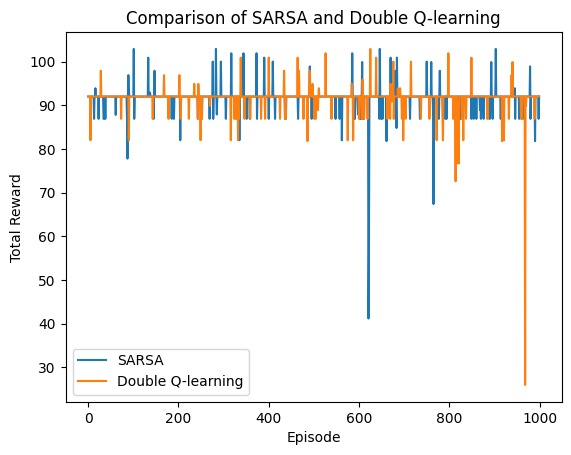

In [ ]:
plt.plot(sarsa_rewards, label='SARSA')
plt.plot(double_q_rewards, label='Double Q-learning')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.title('Comparison of SARSA and Double Q-learning')
plt.show()